# Projeto de Redes Sociais

### Diferencas nas Redes Sociais de Game of Thrones no livro e na serie

---
***
___
### LIVRO:

##### Carregando datasets do livro:

In [1]:
import pandas as pd

# dataset do livro 1
book1 = pd.read_csv('data_new/book1-edges.csv')
book1.head()

# dataset do livro 2
book2 = pd.read_csv('data_new/book2-edges.csv')
book2.head()

# dataset do livro 3
book3 = pd.read_csv('data_new/book3-edges.csv')
book3.head()

# dataset do livro 4
book4 = pd.read_csv('data_new/book4-edges.csv')
book4.head()

# dataset do livro 5
book5 = pd.read_csv('data_new/book5-edges.csv')
book5.head()

,Source,Target,Type,Weight,book
0,AEGON,DAENERYS,UNDIRECTED,4,5
1,AEGON-(SON-OF-RHAEGAR),DAENERYS,UNDIRECTED,11,5
2,AEGON-(SON-OF-RHAEGAR),ELIA,UNDIRECTED,4,5
3,AEGON-(SON-OF-RHAEGAR),FRANKLYN-FLOWERS,UNDIRECTED,3,5
4,AEGON-(SON-OF-RHAEGAR),HALDON,UNDIRECTED,14,5


Essa tabela apresenta as relacoes entre os personagens, sendo definidas pela presenca dos nomes de ambos com uma distancia de no maximo 15 palavras entre si.

As colunas Source e Target apresentam os personagens ligados entre si, a coluna Type determina o tipo de ligacao, sendo para este caso sempre nao direcionada. A coluna Weight apresenta o numero de ocorrencias de uma relacao entre os dois personagens no livro especificado pela coluna livro. Nesse caso, como estamos carregando os datasets de cada livro separadamente, a coluna livro nao tem muito proposito.

Observacao: As relacoes com Weight menor de 3 foram cortadas da tabela por serem consideradas acidentais em sua maioria.

##### Criando as redes dos livros

In [2]:
import networkx as nx
import freeman as fm
from random import randint

def criar_grafo(csv):
    g1 = fm.Graph(nx.empty_graph())
    g1.add_node("DAENERYS", pos = [randint(0,800), randint(0,450)], label = "DAENERYS")
    for n, edge in csv.iterrows():
        #print("NODEx: ", edge['Source'])
        #print("NODEy: ", edge['Target'])
        #print("EDGE_WEIGHT: ", edge['weight'])
        
        if(edge['Source'] not in g1):
            g1.add_node(edge['Source'], pos = [randint(0,800), randint(0,450)], label = edge['Source'])
        if(edge['Target'] not in g1):
            g1.add_node(edge['Target'], pos = [randint(0,800), randint(0,450)], label = edge['Target'])

    for n, edge in csv.iterrows():  
        g1.add_edge(edge['Source'], edge['Target'], weight=edge['Weight'])
        
    return g1
    

    
g1 = criar_grafo(book1)
g2 = criar_grafo(book2)
g3 = criar_grafo(book3)
g4 = criar_grafo(book4)
g5 = criar_grafo(book5)

C:\Users\elijo\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



##### Plotando o grafo do livro 1

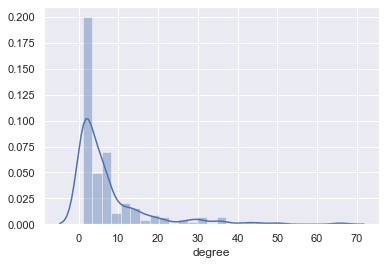

In [3]:

g1.set_all_nodes('size', 12)
g1.set_all_nodes('labpos', 'hover')
g1.set_nodedata('degree', g1.degree)
g1.distest_nodes('degree')
g1.displot_nodes('degree')
#g1.move('step')
g1.move('kamada_kawai')
g1.scale_nodes_size(g1.degree)
#g1.color_nodes()
g1.draw()


##### Calculando Betweenness para cada livro

In [4]:
b_livro1 = nx.betweenness_centrality(g1)
b_livro2 = nx.betweenness_centrality(g2)
b_livro3 = nx.betweenness_centrality(g3)
b_livro4 = nx.betweenness_centrality(g4)
b_livro5 = nx.betweenness_centrality(g5)

c_livro1 = nx.closeness_centrality(g1)
c_livro2 = nx.closeness_centrality(g2)
c_livro3 = nx.closeness_centrality(g3)
c_livro4 = nx.closeness_centrality(g4)
c_livro5 = nx.closeness_centrality(g5)

p_livro1 = nx.pagerank(g1)
p_livro2 = nx.pagerank(g2)
p_livro3 = nx.pagerank(g3)
p_livro4 = nx.pagerank(g4)
p_livro5 = nx.pagerank(g5)

b_livro = [b_livro1, b_livro2, b_livro3, b_livro4, b_livro5]
c_livro = [c_livro1, c_livro2, c_livro3, c_livro4, c_livro5]
p_livro = [p_livro1, p_livro2, p_livro3, p_livro4, p_livro5]

for n in b_livro4:
    print(n, b_livro4[n])

DAENERYS 0.0
ADDAM_MARBRAND 0.0009715677315621072
BRYNDEN 0.0006963444539540115
CERSEI 0.26022037781319207
JAIME 0.24279090054776636
LYLE-CRAKEHALL 7.267864410721553e-05
AEGON-(SON-OF-RHAEGAR) 0.0
RHAEGAR 0.007299073475544064
AEGON 0.0
MAESTER_AEMON 0.014975358719479429
ALLERAS 0.03304046292125406
CLYDAS 0.0
DAREON 0.02205575449887186
GILLY 0.010233083605223429
JON 0.06325097664436068
SAM 0.14069414134291866
AERON 0.04987584777500744
ASHA 0.02494350304224249
BAELOR-BLACKTYDE 0.0
BALON 0.18981631113984054
DUNSTAN-DRUMM 6.534665148110525e-05
EMMOND 0.0
EURON 0.036961387118950015
GORMOND-GOODBROTHER 0.0
GOROLD-GOODBROTHER 0.0
GREYDON-GOODBROTHER 0.0
MELDRED-MERLYN 0.0
MURENMURE 0.0
RUS 0.0
THEON 6.310216394250007e-05
VICTARION 0.05826606283539041
AERYS 0.029265425214137636
BARRISTAN 0.0
DENYS-DARKLYN 0.0
ELBERT 0.0
OWEN-MERRYWEATHER 0.0
ROBERT 0.09640593156241532
TYWIN 0.0736726485466802
ALLA 0.0003223948258185113
ELINOR 6.0601163542340014e-05
MARGAERY 0.03590077000963408
MEGGA 0.0
OSNEY-

In [5]:
personagem_b_livro = []
for b in b_livro:
    personagem_b_livro.append(b["TYRION"])
    
print("TYRION - Betweenness:", personagem_b_livro)

personagem_c_livro = []
for c in c_livro:
    personagem_c_livro.append(c["TYRION"])
    
print("TYRION - Closeness:", personagem_c_livro)

personagem_p_livro = []
for p in p_livro:
    personagem_p_livro.append(p["TYRION"])
    
print("TYRION - Pagerank:", personagem_p_livro)

TYRION - Betweenness: [0.18828696791582564, 0.1580998132855627, 0.15239026580955364, 0.08314156805289673, 0.1990861155212145]
TYRION - Closeness: [0.5096952908587258, 0.4473684210526316, 0.4574468085106383, 0.3973660747854296, 0.40359897172236503]
TYRION - Pagerank: [0.0431044809459164, 0.04682795869136811, 0.036441814662617485, 0.01256780230257688, 0.029088500831475173]


##### Calculando e inserindo metricas no grafo

In [6]:
def calcula_metricas(g1):
    g1.set_nodedata('betweenness', nx.betweenness_centrality(g1))
    g1.set_nodedata('closeness', nx.closeness_centrality(g1))
    g1.set_nodedata('pagerank', nx.pagerank(g1))


calcula_metricas(g1)
calcula_metricas(g2)
calcula_metricas(g3)
calcula_metricas(g4)
calcula_metricas(g5)
tabela_total = g1.nodeframe
g1.nodeframe.head()


,degree,betweenness,closeness,pagerank
DAENERYS,21,0.087282,0.406181,0.027367
ADDAM_MARBRAND,2,0.000000,0.323944,0.001287
JAIME,29,0.032362,0.462312,0.014458
TYWIN,22,0.026605,0.449878,0.011474
AEGON,2,0.000000,0.377049,0.001266


---
***
___
### SERIE:

##### Carregando dataset da serie:

In [7]:
# dataset da temporada 1
season1 = pd.read_csv('data/s1-edges.csv')
season1.head()

# dataset da temporada 2
season2 = pd.read_csv('data/s2-edges.csv')
season2.head()

# dataset da temporada 3
season3 = pd.read_csv('data/s3-edges.csv')
season3.head()

# dataset da temporada 4
season4 = pd.read_csv('data/s4-edges.csv')
season4.head()

# dataset da temporada 5
season5 = pd.read_csv('data/s5-edges.csv')
season5.head()

# dataset da temporada 6
season6 = pd.read_csv('data/s6-edges.csv')
season6.head()

# dataset da temporada 7
season7 = pd.read_csv('data/s7-edges.csv')
season7.head()


,Source,Target,Weight,Season
0,DAENERYS,TYRION,179,7
1,DAENERYS,JON,178,7
2,CERSEI,JAIME,172,7
3,ARYA,SANSA,156,7
4,JON,TYRION,107,7


##### Criando as redes das temporadas

In [8]:
s1 = criar_grafo(season1)
s2 = criar_grafo(season2)
s3 = criar_grafo(season3)
s4 = criar_grafo(season4)
s5 = criar_grafo(season5)
s6 = criar_grafo(season6)
s7 = criar_grafo(season7)



##### Plotando o grafo da temporada 1

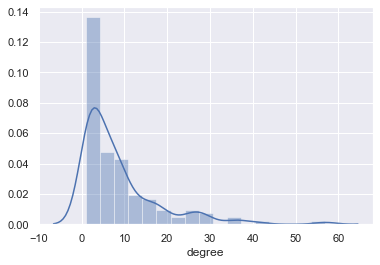

In [9]:
s1.set_all_nodes('size', 12)
s1.set_all_nodes('labpos', 'hover')
s1.set_nodedata('degree', s1.degree)
df = s1.distest_nodes('degree')
s1.displot_nodes('degree')
#s1.move('step')
s1.move('kamada_kawai')
s1.scale_nodes_size(s1.degree)
#s1.color_nodes()
#s1.scale_nodes_dark(nx.closeness_centrality(s1))
s1.draw()

In [10]:
df

,p-value
Shapiro-Wilk (normal),0.000000
D'Agostino-Pearson (normal),0.000000
Kolmogorov-Smirnov (normal),0.000023
Kolmogorov-Smirnov (powerlaw),0.000000
Kolmogorov-Smirnov (exponential),0.001954


##### Calculando Betweenness para cada temporada

In [11]:
b_serie1 = nx.betweenness_centrality(s1)
b_serie2 = nx.betweenness_centrality(s2)
b_serie3 = nx.betweenness_centrality(s3)
b_serie4 = nx.betweenness_centrality(s4)
b_serie5 = nx.betweenness_centrality(s5)
b_serie6 = nx.betweenness_centrality(s6)
b_serie7 = nx.betweenness_centrality(s7)

c_serie1 = nx.closeness_centrality(s1)
c_serie2 = nx.closeness_centrality(s2)
c_serie3 = nx.closeness_centrality(s3)
c_serie4 = nx.closeness_centrality(s4)
c_serie5 = nx.closeness_centrality(s5)
c_serie6 = nx.closeness_centrality(s6)
c_serie7 = nx.closeness_centrality(s7)

p_serie1 = nx.pagerank(s1)
p_serie2 = nx.pagerank(s2)
p_serie3 = nx.pagerank(s3)
p_serie4 = nx.pagerank(s4)
p_serie5 = nx.pagerank(s5)
p_serie6 = nx.pagerank(s6)
p_serie7 = nx.pagerank(s7)

b_serie = [b_serie1, b_serie2, b_serie3, b_serie4, b_serie5]
c_serie = [c_serie1, c_serie2, c_serie3, c_serie4, c_serie5]
p_serie = [p_serie1, p_serie2, p_serie3, p_serie4, p_serie5]

for n in b_serie1:
    print(n, b_serie1[n])

DAENERYS 0.10075782537259582
NED 0.3006678156106007
ROBERT 0.10989974270115796
JORAH 0.05342257003267803
JON 0.08512842627581105
SAM 0.03214407109645205
LITTLEFINGER 0.015700379776754644
VARYS 0.025424460116749734
DROGO 0.02792989205938548
ARYA 0.0656514696720996
CATELYN 0.12327285973045146
ROBB 0.07936180443779715
BRONN 0.003618935859578387
TYRION 0.16947408623776328
CERSEI 0.017653407677459952
SHAE 0.0
JOFFREY 0.028549694663168344
SANSA 0.01992488645309557
PYCELLE 0.0020485680198614404
VISERYS 0.00624781757694564
SEPTA_MORDANE 0.00020076043885567695
TYWIN 0.026441333439792717
JEOR 0.03534751985568738
THEON 0.02956314399888157
BRAN 0.0258184376805872
MAESTER_LUWIN 0.002503716741622247
JAIME 0.020701269829928558
LORAS 0.015914285714285714
RENLY 0.005546062361290171
MIRRI_MAZ_DUUR 0.0
SYRIO_FOREL 0.0
JORY_CASSEL 0.0014212018917901267
PYP 0.06035146783454571
ROS 0.0005410368621337217
GRENN 0.0018844163396352692
WALDER 0.0332172335600907
DOREAH 0.016318883108799073
BENJEN 0.00061621464955

In [12]:
personagem_b_serie = []
for b in b_serie:
    personagem_b_serie.append(b["TYRION"])
    
print("TYRION - Betweenness:", personagem_b_serie)

personagem_c_serie = []
for c in c_serie:
    personagem_c_serie.append(c["TYRION"])
    
print("TYRION - Closeness:", personagem_c_serie)

personagem_p_serie = []
for p in p_serie:
    personagem_p_serie.append(p["TYRION"])
    
print("TYRION - Pagerrank:", personagem_p_serie)

TYRION - Betweenness: [0.16947408623776328, 0.14278938847830466, 0.09865173199290381, 0.09095759740305433, 0.12635168545615638]
TYRION - Closeness: [0.5431034482758621, 0.4787776527934008, 0.41694915254237286, 0.4065335753176043, 0.3881578947368421]
TYRION - Pagerrank: [0.05004312439830023, 0.058644052888662375, 0.03998236417824795, 0.04036703404535525, 0.032758944911689104]


##### Calculando e Inserindo centralidades no grafo

In [13]:
def calcula_metricas(g1):
    g1.set_nodedata('betweenness', nx.betweenness_centrality(g1))
    g1.set_nodedata('closeness', nx.closeness_centrality(g1))
    g1.set_nodedata('pagerank', nx.pagerank(g1))

    


calcula_metricas(s1)
calcula_metricas(s2)
calcula_metricas(s3)
calcula_metricas(s4)
calcula_metricas(s5)
s1.nodeframe.head()

,degree,betweenness,closeness,pagerank
DAENERYS,18,0.100758,0.454874,0.036101
NED,57,0.300668,0.626866,0.081778
ROBERT,36,0.109900,0.552632,0.034330
JORAH,15,0.053423,0.431507,0.020155
JON,26,0.085128,0.518519,0.038775


##### Analises de redes para o Personagem: Tyrion Lannister

<img src="tyrion.jpg" width="200" height="200" align="left" />

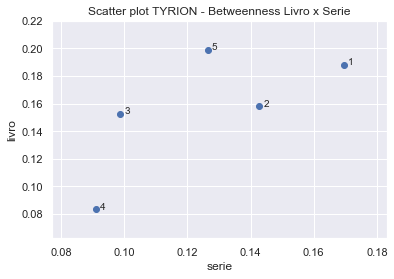

In [14]:
#s1.scaplot_nodes('outdegree', 'hub')
import matplotlib.pyplot as plt

lista = [1, 2, 3, 4, 5]
fig, ax = plt.subplots()
plt.scatter(personagem_b_serie, personagem_b_livro)
plt.title('Scatter plot TYRION - Betweenness Livro x Serie')
plt.xlabel('serie')
plt.ylabel('livro')

for i, txt in enumerate(lista):
    ax.annotate(txt, (personagem_b_serie[i]+0.0013, personagem_b_livro[i]))

plt.show()

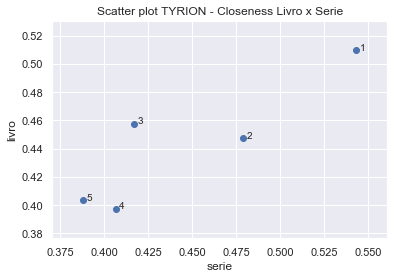

In [15]:
fig, ax = plt.subplots()
plt.scatter(personagem_c_serie, personagem_c_livro)
plt.title('Scatter plot TYRION - Closeness Livro x Serie')
plt.xlabel('serie')
plt.ylabel('livro')

for i, txt in enumerate(lista):
    ax.annotate(txt, (personagem_c_serie[i]+0.002, personagem_c_livro[i]))

plt.show()

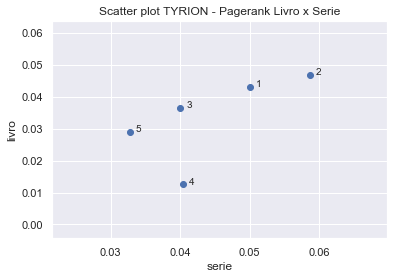

In [16]:
fig, ax = plt.subplots()
plt.scatter(personagem_p_serie, personagem_p_livro)
plt.title('Scatter plot TYRION - Pagerank Livro x Serie')
plt.xlabel('serie')
plt.ylabel('livro')

for i, txt in enumerate(lista):
    ax.annotate(txt, (personagem_p_serie[i]+0.0009, personagem_p_livro[i]))

plt.show()


##### Analises de redes para os personagens mais importantes

In [17]:


for index, row in tabela_total.iterrows():
    print(row)
    print(index)
    print('___________')

degree         21.000000
betweenness     0.087282
closeness       0.406181
pagerank        0.027367
Name: DAENERYS, dtype: float64
DAENERYS
___________
degree         2.000000
betweenness    0.000000
closeness      0.323944
pagerank       0.001287
Name: ADDAM_MARBRAND, dtype: float64
ADDAM_MARBRAND
___________
degree         29.000000
betweenness     0.032362
closeness       0.462312
pagerank        0.014458
Name: JAIME, dtype: float64
JAIME
___________
degree         22.000000
betweenness     0.026605
closeness       0.449878
pagerank        0.011474
Name: TYWIN, dtype: float64
TYWIN
___________
degree         2.000000
betweenness    0.000000
closeness      0.377049
pagerank       0.001266
Name: AEGON, dtype: float64
AEGON
___________
degree         66.000000
betweenness     0.271531
closeness       0.564417
pagerank        0.072635
Name: NED, dtype: float64
NED
___________
degree         7.000000
betweenness    0.010964
closeness      0.336996
pagerank       0.005854
Name: MAESTER_AE

In [18]:
tabela_total.columns

Index(['degree', 'betweenness', 'closeness', 'pagerank'], dtype='object')

In [19]:
personagem_b_serie = []
personagem_b_livro = []
i = 0
for b in b_serie:
    
    #print(b['NED'])
    for k in b.keys():
        #print(b_livro[i])
        if(k in b_livro[i]):
            personagem_b_serie.append(b[k])
            personagem_b_livro.append(b_livro[i][k])
    i +=1


C:\Users\elijo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.

C:\Users\elijo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning:

Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.



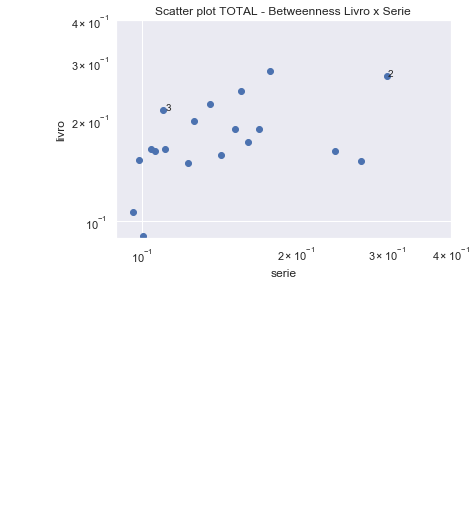

In [20]:
lista = [1, 2, 3, 4, 5]
fig, ax = plt.subplots()
plt.scatter(personagem_b_serie, personagem_b_livro)
plt.title('Scatter plot TOTAL - Betweenness Livro x Serie')
plt.xlabel('serie')
plt.ylabel('livro')
ax.set_yscale('log')
ax.set_xscale('log')
plt.ylim(0, 0.4)
plt.xlim(0, 0.4) 

for i, txt in enumerate(lista):
    ax.annotate(txt, (personagem_b_serie[i]+0.0013, personagem_b_livro[i]))

plt.show()

In [33]:
def plot_metrics(personagem):
    personagem_b_livro = []
    for b in b_livro:
        personagem_b_livro.append(b[personagem])

    #print("JON - Betweenness:", personagem_b_livro)

    personagem_c_livro = []
    for c in c_livro:
        personagem_c_livro.append(c[personagem])


    personagem_p_livro = []
    for p in p_livro:
        personagem_p_livro.append(p[personagem])


    personagem_b_serie = []
    for b in b_serie:
        personagem_b_serie.append(b[personagem])


    personagem_c_serie = []
    for c in c_serie:
        personagem_c_serie.append(c[personagem])


    personagem_p_serie = []
    for p in p_serie:
        personagem_p_serie.append(p[personagem])


    #s1.scaplot_nodes('outdegree', 'hub')
    import matplotlib.pyplot as plt

    lista = [1, 2, 3, 4, 5]
    fig, ax = plt.subplots()
    plt.scatter(personagem_b_serie, personagem_b_livro)
    plt.plot(personagem_b_serie, personagem_b_livro)
    plt.title(personagem + ' - Scatter plot - Betweenness Livro x Serie')
    plt.xlabel('serie')
    plt.ylabel('livro')

    for i, txt in enumerate(lista):
        ax.annotate(txt, (personagem_b_serie[i]+0.0013, personagem_b_livro[i]))
        
    

    plt.show()
    
    fig, ax = plt.subplots()
    plt.scatter(personagem_c_serie, personagem_c_livro)
    plt.plot(personagem_c_serie, personagem_c_livro)
    plt.title(personagem + ' - Scatter plot - Closeness Livro x Serie')
    plt.xlabel('serie')
    plt.ylabel('livro')

    for i, txt in enumerate(lista):
        ax.annotate(txt, (personagem_c_serie[i]+0.002, personagem_c_livro[i]))

    plt.show()
    
    fig, ax = plt.subplots()
    plt.scatter(personagem_p_serie, personagem_p_livro)
    plt.plot(personagem_p_serie, personagem_p_livro)
    plt.title(personagem + ' - Scatter plot - Pagerank Livro x Serie')
    plt.xlabel('serie')
    plt.ylabel('livro')

    for i, txt in enumerate(lista):
        ax.annotate(txt, (personagem_p_serie[i]+0.0009, personagem_p_livro[i]))

    plt.show()
    
    
def plot_metrics_complete(personagem):
    
    personagem_b_serie = []
    for b in b_serie:
        personagem_b_serie.append(b[personagem])
    personagem_b_serie.append(b_serie6[personagem])
    personagem_b_serie.append(b_serie7[personagem])


    personagem_c_serie = []
    for c in c_serie:
        personagem_c_serie.append(c[personagem])
    personagem_c_serie.append(c_serie6[personagem])
    personagem_c_serie.append(c_serie7[personagem])


    personagem_p_serie = []
    for p in p_serie:
        personagem_p_serie.append(p[personagem])
    personagem_p_serie.append(p_serie6[personagem])
    personagem_p_serie.append(p_serie7[personagem])
        
        
    personagem_b_livro = []
    for b in b_livro:
        personagem_b_livro.append(b[personagem])
    #personagem_b_livro.append(b_serie6[personagem])
    #personagem_b_livro.append(b_serie7[personagem])
    personagem_b_livro.append(0)
    personagem_b_livro.append(0)
    
    #print("JON - Betweenness:", personagem_b_livro)

    personagem_c_livro = []
    for c in c_livro:
        personagem_c_livro.append(c[personagem])
    #personagem_c_livro.append(c_serie6[personagem])
    #personagem_c_livro.append(c_serie7[personagem])
    personagem_c_livro.append(0)
    personagem_c_livro.append(0)


    personagem_p_livro = []
    for p in p_livro:
        personagem_p_livro.append(p[personagem])
    #personagem_p_livro.append(p_serie6[personagem])
    #personagem_p_livro.append(p_serie7[personagem])
    personagem_p_livro.append(0)
    personagem_p_livro.append(0)





    #s1.scaplot_nodes('outdegree', 'hub')
    import matplotlib.pyplot as plt

    lista = [1, 2, 3, 4, 5, 6, 7]
    fig, ax = plt.subplots()
    plt.scatter(personagem_b_serie, personagem_b_livro)
    plt.plot(personagem_b_serie, personagem_b_livro)
    plt.title(personagem + ' - Scatter plot - Betweenness Livro x Serie')
    plt.xlabel('serie')
    plt.ylabel('livro')

    for i, txt in enumerate(lista):
        ax.annotate(txt, (personagem_b_serie[i]+0.0013, personagem_b_livro[i]))

    plt.show()
    
    fig, ax = plt.subplots()
    plt.scatter(personagem_c_serie, personagem_c_livro)
    plt.plot(personagem_c_serie, personagem_c_livro)
    plt.title(personagem + ' - Scatter plot - Closeness Livro x Serie')
    plt.xlabel('serie')
    plt.ylabel('livro')

    for i, txt in enumerate(lista):
        ax.annotate(txt, (personagem_c_serie[i]+0.002, personagem_c_livro[i]))

    plt.show()
    
    fig, ax = plt.subplots()
    plt.scatter(personagem_p_serie, personagem_p_livro)
    plt.plot(personagem_p_serie, personagem_p_livro)
    plt.title(personagem + ' - Scatter plot - Pagerank Livro x Serie')
    plt.xlabel('serie')
    plt.ylabel('livro')

    for i, txt in enumerate(lista):
        ax.annotate(txt, (personagem_p_serie[i]+0.0009, personagem_p_livro[i]))

    plt.show()


---
***
___
### JON SNOW:

<img src="jon.jpg" width="200" height="200" align="left" />

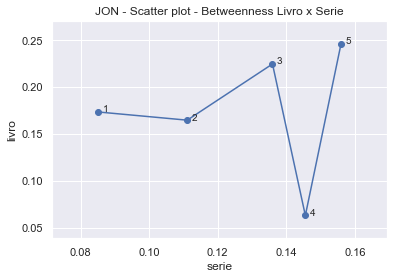

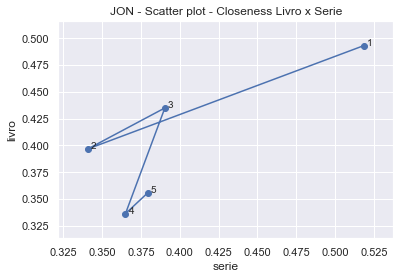

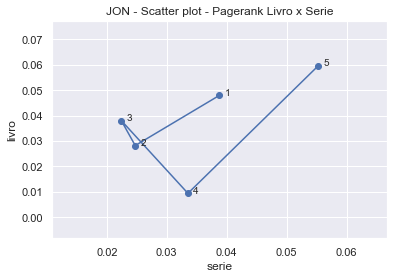

In [34]:
plot_metrics("JON")

---
***
___
### DAENERYS:

<img src="dany.png" width="200" height="200" align="left" />

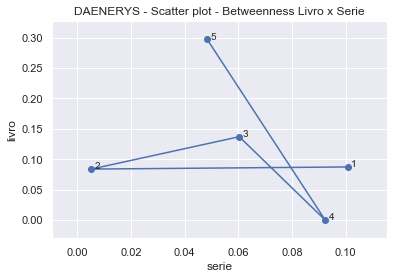

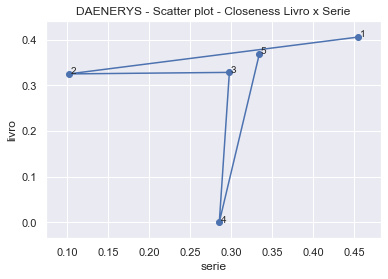

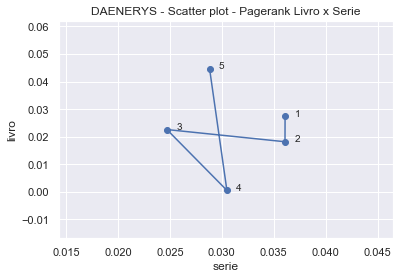

In [35]:
plot_metrics("DAENERYS")

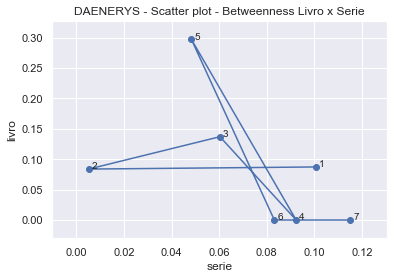

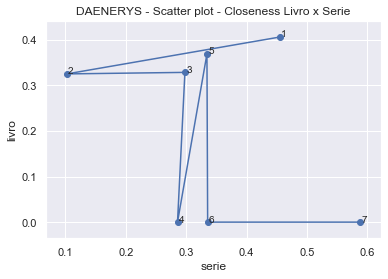

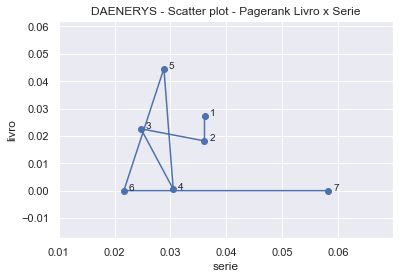

In [36]:
plot_metrics_complete("DAENERYS")

---
***
___
### ARYA:

<img src="arya.jpg" width="200" height="200" align="left" />

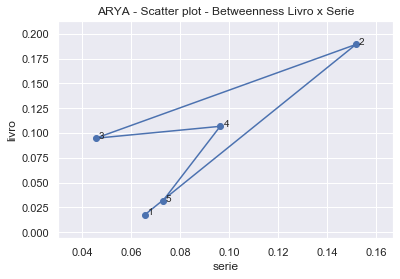

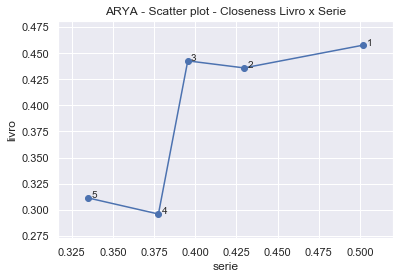

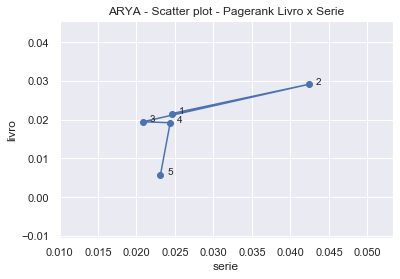

In [37]:
plot_metrics("ARYA")

---
***
___
### CERSEI:

<img src="cersei.jpg" width="300" height="300" align="left" />

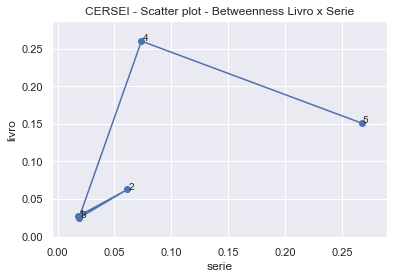

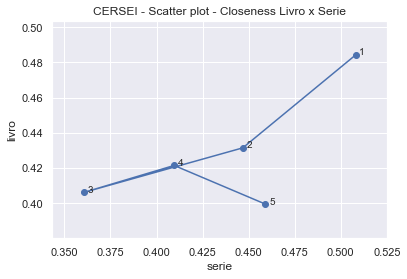

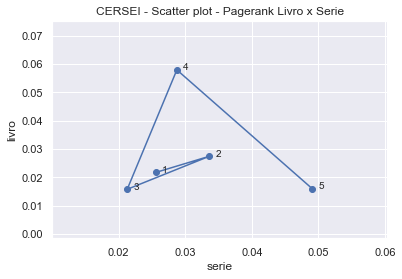

In [38]:
plot_metrics("CERSEI")

---
***
___
### SANSA:

<img src="sansa.jpg" width="200" height="200" align="left" />

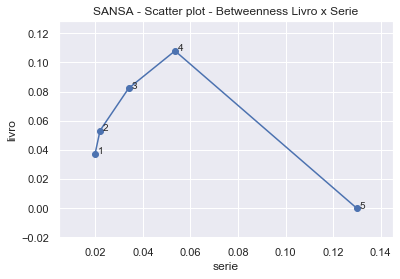

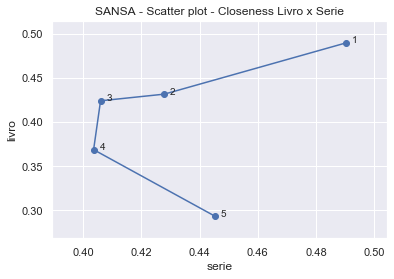

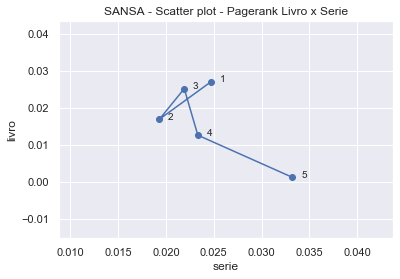

In [39]:
plot_metrics("SANSA")

---
***
___
### BRAN:

<img src="bran.jpg" width="300" height="300" align="left" />

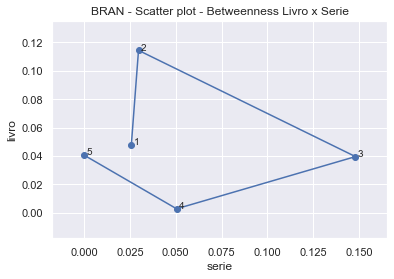

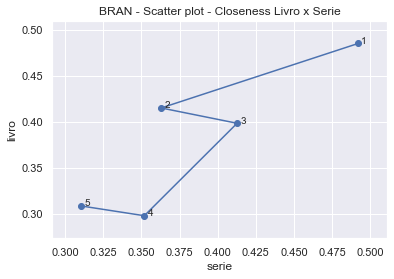

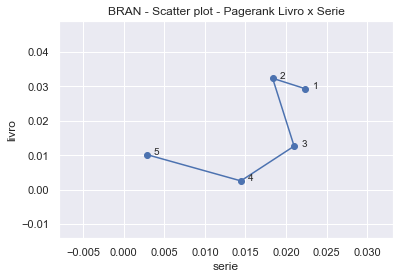

In [40]:
plot_metrics("BRAN")

---
***
___
### JAIME:

<img src="jaime.jpg" width="200" height="200" align="left" />

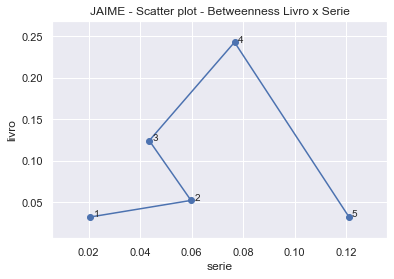

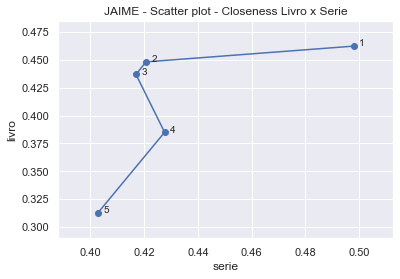

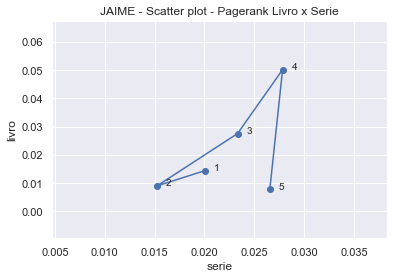

In [41]:
plot_metrics("JAIME")

---
***
___
### RATINGS DAS TEMPORADAS:

##### TEMPORADA 1 -     9,09:
##### TEMPORADA 2 -      8,96:
##### TEMPORADA 3 -     9,04:
##### TEMPORADA 4 -     9,30:
##### TEMPORADA 5 -     8,83:
##### TEMPORADA 6 -     9,06:
##### TEMPORADA 7 -     9,12: